In [3]:
from statsforecast import StatsForecast
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\fs\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__("pkg_resources").declare_namespace(__name__)  # type: ignore
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
itc_df = pd.read_csv("ITC_2024.csv")
itc_test = pd.read_csv("ITC_Test.csv")

In [5]:
itc_df

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
0,2000-04-03,EQ,739.90,800.80,721.05,741.45,792.75,797.00,772.76,1140.8,580.00,1720025,1.329165e+09,NaN
1,2000-04-04,EQ,785.00,785.00,733.25,797.00,733.25,733.25,744.37,1140.8,580.00,581309,4.327067e+08,NaN
2,2000-04-05,EQ,680.00,740.00,675.05,733.25,696.10,698.75,700.53,1140.8,580.00,706269,4.947637e+08,NaN
3,2000-04-06,EQ,705.00,711.00,646.10,698.75,685.00,682.80,676.06,1140.8,580.00,431386,2.916423e+08,NaN
4,2000-04-07,EQ,682.00,733.90,682.00,682.80,730.00,730.95,722.23,1140.8,580.00,1087357,7.853181e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [6]:
# -------------------------------------
# Creating test train validation set 
# -------------------------------------
filter_date = '2022-03-28'

itc_filtered = itc_df[itc_df['date']>=filter_date]

In [7]:
itc_filtered.columns

Index(['date', 'series', 'open', 'high', 'low', 'prev._close', 'ltp', 'close',
       'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades'],
      dtype='object')

In [8]:
# -------------------------------------
# Creating filtered set into required format and retaining date column for train val split
# -------------------------------------

itc_filtered = itc_filtered[['date','close']]
itc_filtered['unique_id'] = 1
itc_filtered['ds'] = itc_filtered['date']
itc_filtered.rename(columns={
    'close':'y'}, inplace=True
)
itc_filtered

,date,y,unique_id,ds
5482,2022-03-28,257.05,1,2022-03-28
5483,2022-03-29,254.60,1,2022-03-29
5484,2022-03-30,249.20,1,2022-03-30
5485,2022-03-31,250.65,1,2022-03-31
5486,2022-04-01,253.30,1,2022-04-01
...,...,...,...,...
5976,2024-03-21,421.25,1,2024-03-21
5977,2024-03-22,428.60,1,2024-03-22
5978,2024-03-26,427.65,1,2024-03-26
5979,2024-03-27,428.00,1,2024-03-27


In [9]:
train_val_date_split = '2024-03-01'

itc_train = itc_filtered[itc_filtered['date']<train_val_date_split]
itc_train

itc_train['date'] = pd.to_datetime(itc_train['date'])


C:\Users\user\AppData\Local\Temp\ipykernel_10956\117226567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itc_train['date'] = pd.to_datetime(itc_train['date'])


In [10]:
itc_val = itc_filtered[itc_filtered['date']>=train_val_date_split]
itc_val['date'] = pd.to_datetime(itc_val['date'])
itc_val

C:\Users\user\AppData\Local\Temp\ipykernel_10956\2576704961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itc_val['date'] = pd.to_datetime(itc_val['date'])


,date,y,unique_id,ds
5962,2024-03-01,409.50,1,2024-03-01
5963,2024-03-02,412.05,1,2024-03-02
5964,2024-03-04,409.10,1,2024-03-04
5965,2024-03-05,406.15,1,2024-03-05
5966,2024-03-06,407.85,1,2024-03-06
5967,2024-03-07,413.55,1,2024-03-07
5968,2024-03-11,409.40,1,2024-03-11
5969,2024-03-12,404.45,1,2024-03-12
5970,2024-03-13,422.45,1,2024-03-13
5971,2024-03-14,419.65,1,2024-03-14


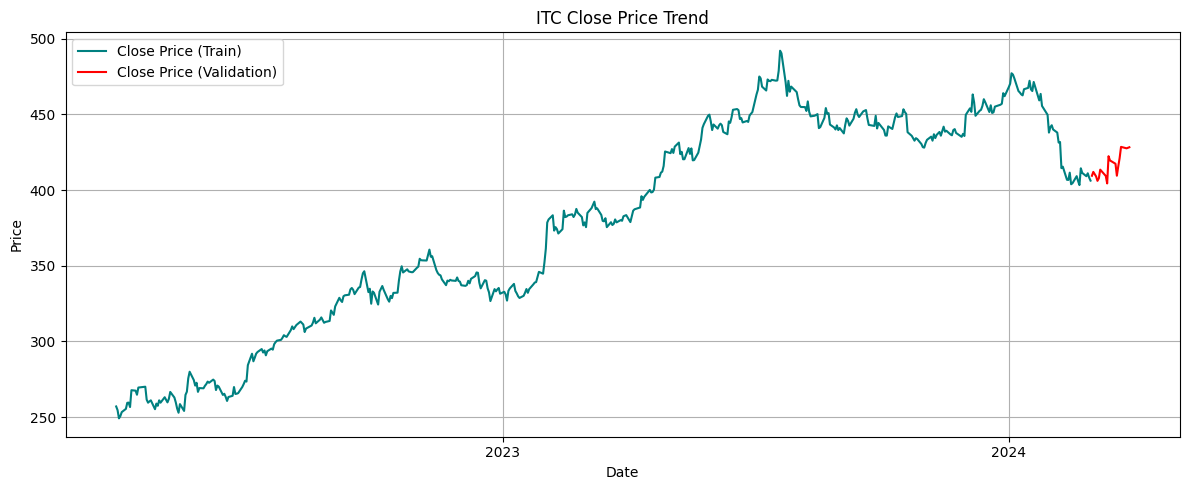

In [11]:
import matplotlib.dates as mdates


# Plot
plt.figure(figsize=(12, 5))
plt.plot(itc_train['date'], itc_train['y'], label=f'{'close'.title()} Price (Train)', color='teal')
plt.plot(itc_val['date'],itc_val['y'],label=f'{'close'.title()} Price (Validation)', color='red')

# Format x-axis to show years only
plt.gca().xaxis.set_major_locator(mdates.YearLocator())           # Tick every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title(f'ITC {'close'.title()} Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# -------------------------------------
# Creating statsmodels object
# -------------------------------------

# itc_train = itc_train.drop(columns=['date'])

# Sort by date
itc_train = itc_train.sort_values('date')

# Create row number (starting from 1)
itc_train['ds'] = range(1, len(itc_train) + 1)

itc_train = itc_train[['unique_id','ds','y']]


In [13]:
from statsforecast.models import (
    AutoARIMA,
    AutoETS,
    AutoRegressive,
    SimpleExponentialSmoothing,
    SeasonalExponentialSmoothing,
    Holt,
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive,
    RandomWalkWithDrift,
    WindowAverage,
    MSTL
)

# Create a list of models and instantiation parameters
models = [
    AutoARIMA(season_length=12),
    AutoETS(season_length=12),
    AutoRegressive(lags=12),
    SimpleExponentialSmoothing(alpha=0.5),
    SeasonalExponentialSmoothing(alpha=0.5, season_length=12),
    Holt(season_length=12),
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=12),
    HistoricAverage(),
    DOT(season_length=12),
    RandomWalkWithDrift(),
    WindowAverage(window_size=12),
    MSTL(season_length=12)
]

# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq=1, 
    fallback_model = SeasonalNaive(season_length=12),
    n_jobs=-1,
)

forecasts_df = sf.forecast(df=itc_train, h=19)
forecasts_df.head()

,unique_id,ds,AutoARIMA,AutoETS,AutoRegressive,SES,SeasonalES,Holt,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,RWD,WindowAverage,MSTL
0,1,481,406.611587,406.853348,406.514286,407.855516,432.767846,406.683507,411.55,416.239824,411.55,377.874375,406.351653,406.611587,408.295833,408.627387
1,1,482,406.923173,407.282116,406.031845,407.855516,425.838459,406.991886,403.90,416.239824,403.90,377.874375,405.452143,406.923173,408.295833,405.682545
2,1,483,407.234760,407.710883,406.504073,407.855516,427.346243,407.300266,404.60,416.239824,404.60,377.874375,406.107448,407.234760,408.295833,406.578244
3,1,484,407.546347,408.139651,406.426399,407.855516,430.732291,407.608645,409.25,416.239824,409.25,377.874375,406.088973,407.546347,408.295833,410.216547
4,1,485,407.857933,408.568419,406.408973,407.855516,428.915986,407.917025,406.10,416.239824,406.10,377.874375,404.728054,407.857933,408.295833,410.133805


In [14]:
len(itc_val)

19

In [15]:
itc_val

,date,y,unique_id,ds
5962,2024-03-01,409.50,1,2024-03-01
5963,2024-03-02,412.05,1,2024-03-02
5964,2024-03-04,409.10,1,2024-03-04
5965,2024-03-05,406.15,1,2024-03-05
5966,2024-03-06,407.85,1,2024-03-06
5967,2024-03-07,413.55,1,2024-03-07
5968,2024-03-11,409.40,1,2024-03-11
5969,2024-03-12,404.45,1,2024-03-12
5970,2024-03-13,422.45,1,2024-03-13
5971,2024-03-14,419.65,1,2024-03-14


In [16]:
forecasts_df.columns

Index(['unique_id', 'ds', 'AutoARIMA', 'AutoETS', 'AutoRegressive', 'SES',
       'SeasonalES', 'Holt', 'HoltWinters', 'CrostonClassic', 'SeasonalNaive',
       'HistoricAverage', 'DynamicOptimizedTheta', 'RWD', 'WindowAverage',
       'MSTL'],
      dtype='object')

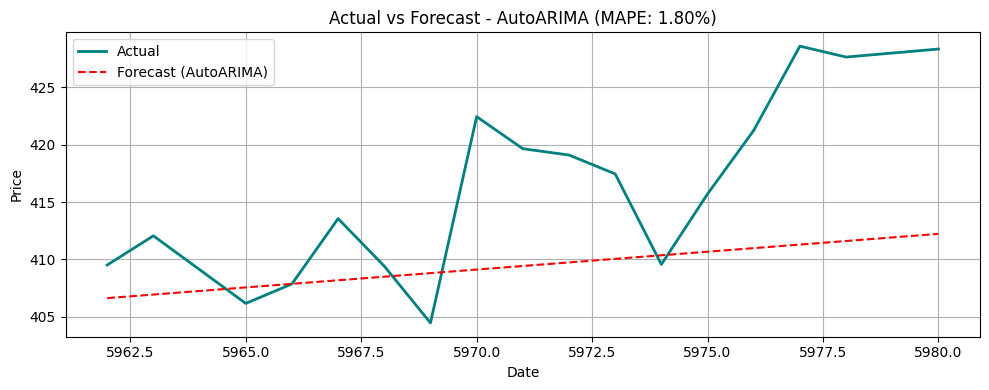

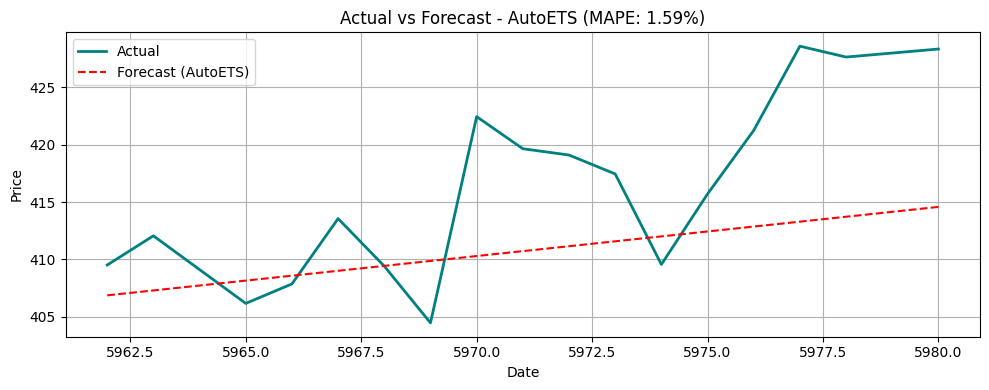

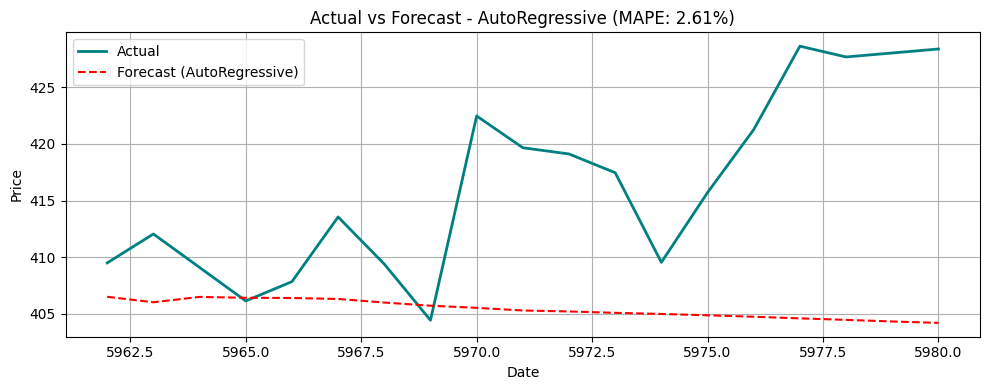

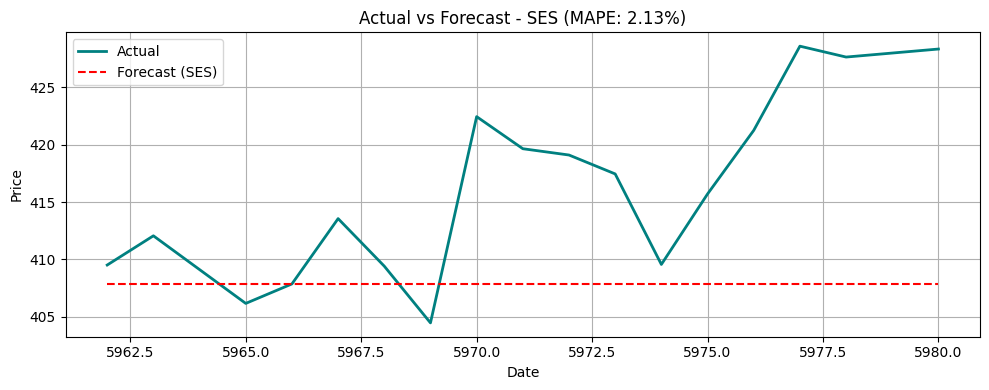

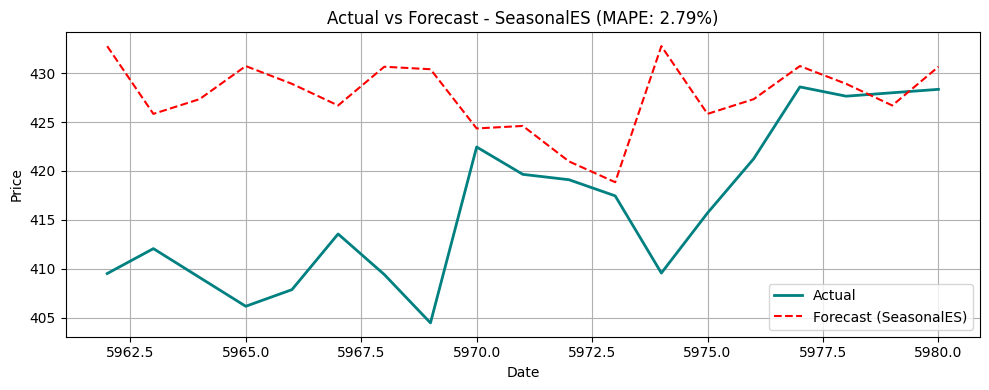

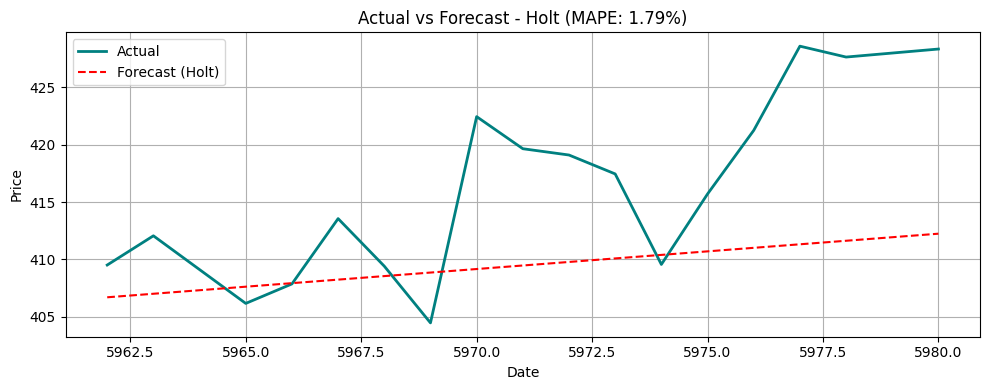

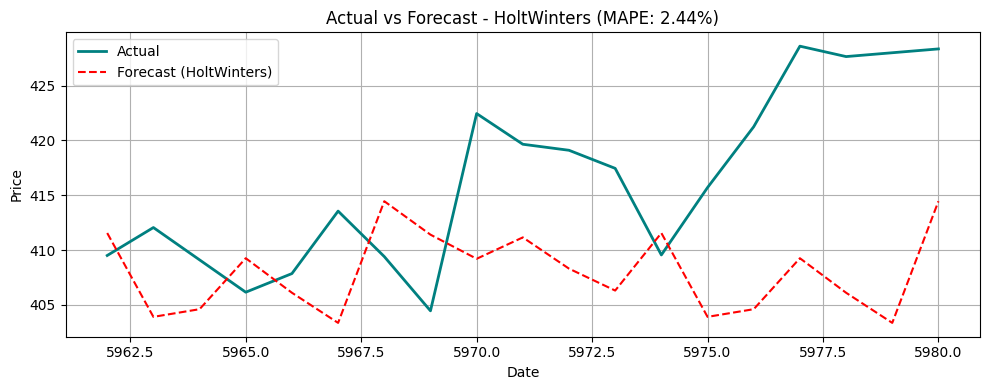

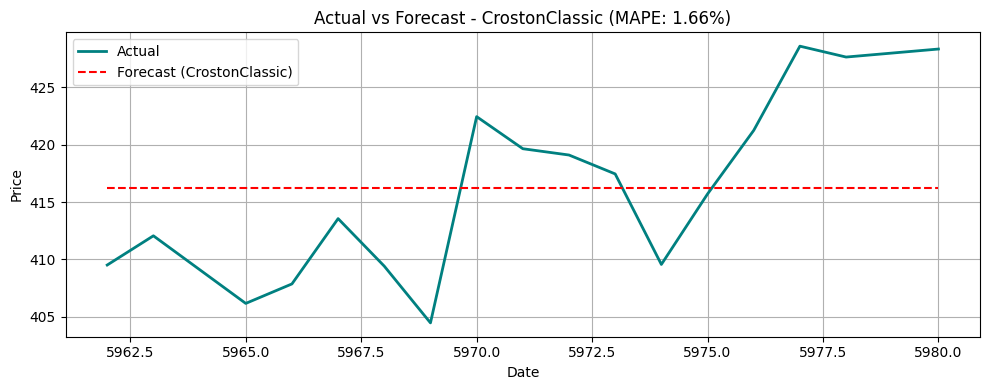

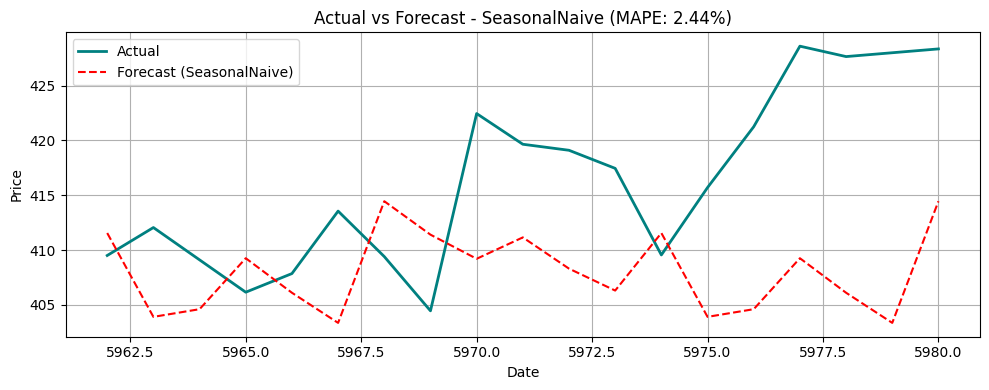

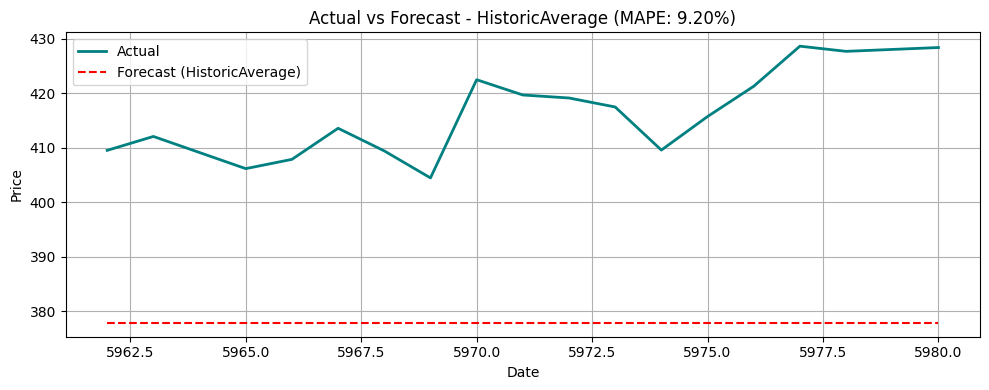

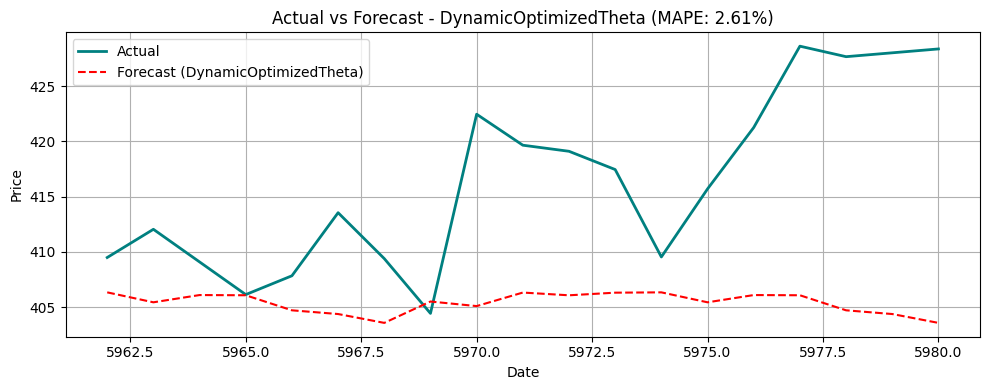

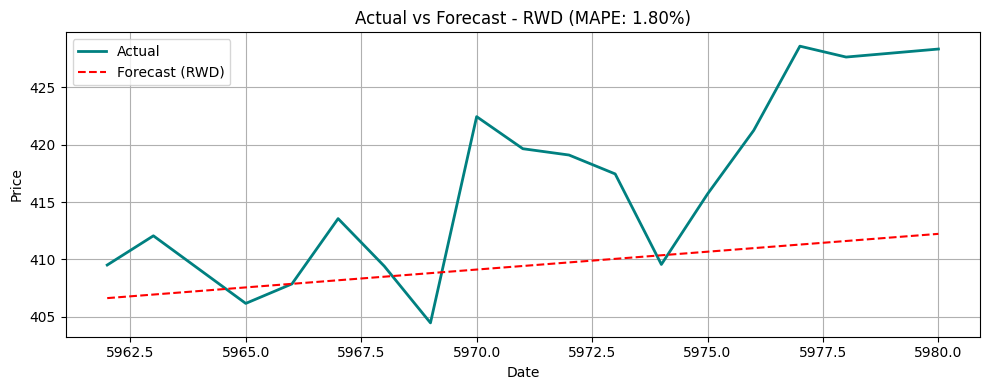

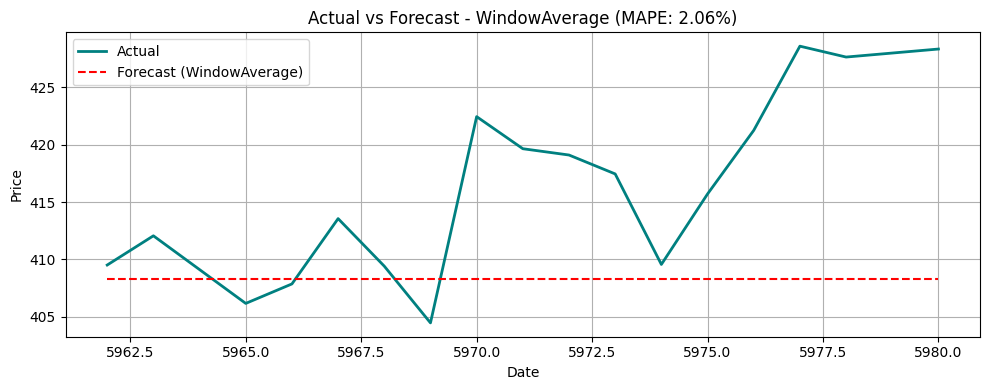

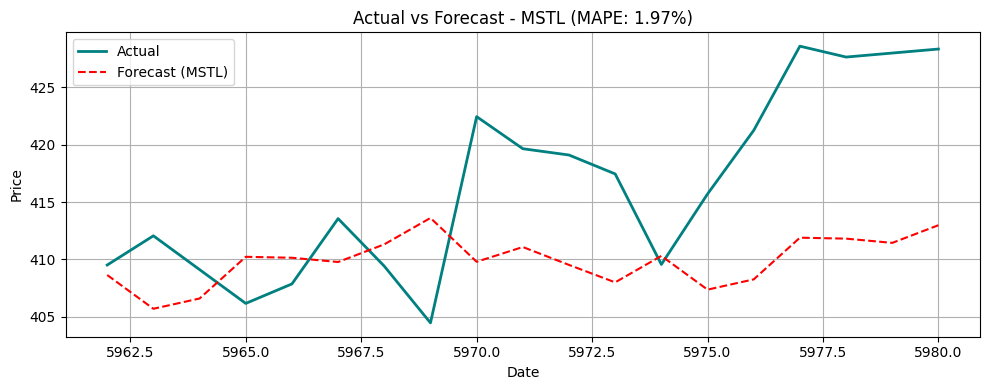

In [17]:
from sklearn.metrics import mean_absolute_percentage_error

mape_scores= []

for col in forecasts_df.columns:
    if col not in ['ds', 'unique_id']:
        preds = forecasts_df[col].values
        mape = mean_absolute_percentage_error(itc_val['y'], preds)
        mape_scores.append({
            'model':col,
            'mape':mape
        })

        # Plotting
        plt.figure(figsize=(10, 4))
        plt.plot(itc_val.index, itc_val['y'], label='Actual', color='teal', linewidth=2)
        plt.plot(itc_val.index, preds, label=f'Forecast ({col})', color='red', linestyle='--')
        plt.title(f'Actual vs Forecast - {col} (MAPE: {mape:.2%})')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


        #mape_scores[col] = round(mape * 100, 2)
        #val_mape = mean_absolute_percentage_error(forecasts_df)

In [18]:
mape_scores

[{'model': 'AutoARIMA', 'mape': 0.01796086857240899},
 {'model': 'AutoETS', 'mape': 0.015912836031681657},
 {'model': 'AutoRegressive', 'mape': 0.02612119755264533},
 {'model': 'SES', 'mape': 0.02127804697639938},
 {'model': 'SeasonalES', 'mape': 0.027948326696050116},
 {'model': 'Holt', 'mape': 0.01790963427794578},
 {'model': 'HoltWinters', 'mape': 0.024440396495759242},
 {'model': 'CrostonClassic', 'mape': 0.01658945081059473},
 {'model': 'SeasonalNaive', 'mape': 0.024440396495759242},
 {'model': 'HistoricAverage', 'mape': 0.09199110947064988},
 {'model': 'DynamicOptimizedTheta', 'mape': 0.026093609249931784},
 {'model': 'RWD', 'mape': 0.01796086856461859},
 {'model': 'WindowAverage', 'mape': 0.020562350256619212},
 {'model': 'MSTL', 'mape': 0.019748464423855045}]

In [19]:
mape_scores = pd.DataFrame(mape_scores)

In [20]:
mape_scores

,model,mape
0,AutoARIMA,0.017961
1,AutoETS,0.015913
2,AutoRegressive,0.026121
3,SES,0.021278
4,SeasonalES,0.027948
5,Holt,0.017910
6,HoltWinters,0.024440
7,CrostonClassic,0.016589
8,SeasonalNaive,0.024440
9,HistoricAverage,0.091991


In [21]:
# -------
# Ensembling
# -------

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Assume: mape_scores is a list of dicts with keys: 'model', 'mape'
sf_val_mape_df = pd.DataFrame(mape_scores).sort_values(by='mape').reset_index(drop=True)
sf_val_mape_df['rank'] = sf_val_mape_df.index + 1  # Add rank based on MAPE

# Ensemble strategies
ensemble_strategies = ['simple_avg', 'inv_mape', 'inv_rank']
top_n_list = [2, 3, 4, 5]


In [22]:
sf_val_mape_df

,model,mape,rank
0,AutoETS,0.015913,1
1,CrostonClassic,0.016589,2
2,Holt,0.017910,3
3,RWD,0.017961,4
4,AutoARIMA,0.017961,5
5,MSTL,0.019748,6
6,WindowAverage,0.020562,7
7,SES,0.021278,8
8,HoltWinters,0.024440,9
9,SeasonalNaive,0.024440,10


In [23]:
ensemble_results = []  # For model name and MAPE
ensemble_forecasts = {}  # For storing forecast series for each ensemble model

for n in top_n_list:
    top_models = sf_val_mape_df.head(n).copy()
    model_names = top_models['model'].tolist()
    preds = forecasts_df[model_names]

    # Simple Average
    col_name = f'ensemble_top{n}_simple_avg'
    forecasts_df[col_name] = preds.mean(axis=1)
    mape = mean_absolute_percentage_error(itc_val['y'], forecasts_df[col_name])
    ensemble_results.append({'model': col_name, 'mape': mape})
    ensemble_forecasts[col_name] = forecasts_df[col_name].copy()

    # Inverse MAPE weighting
    top_models['inv_mape'] = 1 / top_models['mape']
    top_models['weight'] = top_models['inv_mape'] / top_models['inv_mape'].sum()
    weighted_preds = sum(forecasts_df[model] * w for model, w in zip(top_models['model'], top_models['weight']))
    col_name = f'ensemble_top{n}_inv_mape'
    forecasts_df[col_name] = weighted_preds
    mape = mean_absolute_percentage_error(itc_val['y'], forecasts_df[col_name])
    ensemble_results.append({'model': col_name, 'mape': mape})
    ensemble_forecasts[col_name] = forecasts_df[col_name].copy()

    # Inverse Rank weighting
    top_models['inv_rank'] = 1 / top_models['rank']
    top_models['weight_rank'] = top_models['inv_rank'] / top_models['inv_rank'].sum()
    weighted_rank_preds = sum(forecasts_df[model] * w for model, w in zip(top_models['model'], top_models['weight_rank']))
    col_name = f'ensemble_top{n}_inv_rank'
    forecasts_df[col_name] = weighted_rank_preds
    mape = mean_absolute_percentage_error(itc_val['y'], forecasts_df[col_name])
    ensemble_results.append({'model': col_name, 'mape': mape})
    ensemble_forecasts[col_name] = forecasts_df[col_name].copy()


In [24]:
mape_scores

,model,mape
0,AutoARIMA,0.017961
1,AutoETS,0.015913
2,AutoRegressive,0.026121
3,SES,0.021278
4,SeasonalES,0.027948
5,Holt,0.017910
6,HoltWinters,0.024440
7,CrostonClassic,0.016589
8,SeasonalNaive,0.024440
9,HistoricAverage,0.091991


In [25]:
ensemble_df = pd.DataFrame(ensemble_results).sort_values(by='mape')
ensemble_df


,model,mape
0,ensemble_top2_simple_avg,0.014786
1,ensemble_top2_inv_mape,0.014788
2,ensemble_top2_inv_rank,0.014816
5,ensemble_top3_inv_rank,0.015152
4,ensemble_top3_inv_mape,0.015322
3,ensemble_top3_simple_avg,0.015358
8,ensemble_top4_inv_rank,0.015403
11,ensemble_top5_inv_rank,0.015565
7,ensemble_top4_inv_mape,0.015688
6,ensemble_top4_simple_avg,0.015747


In [26]:
val_results = pd.concat([mape_scores,ensemble_df], ignore_index=True)
val_results

,model,mape
0,AutoARIMA,0.017961
1,AutoETS,0.015913
2,AutoRegressive,0.026121
3,SES,0.021278
4,SeasonalES,0.027948
5,Holt,0.017910
6,HoltWinters,0.024440
7,CrostonClassic,0.016589
8,SeasonalNaive,0.024440
9,HistoricAverage,0.091991


In [27]:
ensemble_forecasts

{'ensemble_top2_simple_avg': 0     411.546586
 1     411.760970
 2     411.975354
 3     412.189737
 4     412.404121
 5     412.618505
 6     412.832889
 7     413.047273
 8     413.261656
 9     413.476040
 10    413.690424
 11    413.904808
 12    414.119192
 13    414.333575
 14    414.547959
 15    414.762343
 16    414.976727
 17    415.191111
 18    415.405494
 Name: ensemble_top2_simple_avg, dtype: float64,
 'ensemble_top2_inv_mape': 0     411.448885
 1     411.667731
 2     411.886578
 3     412.105425
 4     412.324272
 5     412.543118
 6     412.761965
 7     412.980812
 8     413.199658
 9     413.418505
 10    413.637352
 11    413.856199
 12    414.075045
 13    414.293892
 14    414.512739
 15    414.731586
 16    414.950432
 17    415.169279
 18    415.388126
 Name: ensemble_top2_inv_mape, dtype: float64,
 'ensemble_top2_inv_rank': 0     409.982173
 1     410.268018
 2     410.553863
 3     410.839709
 4     411.125554
 5     411.411399
 6     411.697244
 7     411.983

In [28]:

val_results = pd.DataFrame(val_results).sort_values(by='mape').reset_index(drop=True)
val_results['rank'] = val_results.index + 1  # Add rank based on MAPE

val_results

,model,mape,rank
0,ensemble_top2_simple_avg,0.014786,1
1,ensemble_top2_inv_mape,0.014788,2
2,ensemble_top2_inv_rank,0.014816,3
3,ensemble_top3_inv_rank,0.015152,4
4,ensemble_top3_inv_mape,0.015322,5
5,ensemble_top3_simple_avg,0.015358,6
6,ensemble_top4_inv_rank,0.015403,7
7,ensemble_top5_inv_rank,0.015565,8
8,ensemble_top4_inv_mape,0.015688,9
9,ensemble_top4_simple_avg,0.015747,10


In [29]:
import pandas as pd

# Assuming ensemble_forecasts is a dictionary like:
# {'ensemble_top_2_avg': np.array([...]), 'ensemble_top_3_inv_mape': np.array([...]), ...}

# Convert dictionary to long-form DataFrame
ensemble_forecast_df = pd.DataFrame([
    {"model": model_name, "forecast_value": val}
    for model_name, forecast_array in ensemble_forecasts.items()
    for val in forecast_array
])


In [30]:
ensemble_forecast_df

,model,forecast_value
0,ensemble_top2_simple_avg,411.546586
1,ensemble_top2_simple_avg,411.760970
2,ensemble_top2_simple_avg,411.975354
3,ensemble_top2_simple_avg,412.189737
4,ensemble_top2_simple_avg,412.404121
...,...,...
223,ensemble_top5_inv_rank,412.955251
224,ensemble_top5_inv_rank,413.249459
225,ensemble_top5_inv_rank,413.543667
226,ensemble_top5_inv_rank,413.837875


In [31]:
itc_val

,date,y,unique_id,ds
5962,2024-03-01,409.50,1,2024-03-01
5963,2024-03-02,412.05,1,2024-03-02
5964,2024-03-04,409.10,1,2024-03-04
5965,2024-03-05,406.15,1,2024-03-05
5966,2024-03-06,407.85,1,2024-03-06
5967,2024-03-07,413.55,1,2024-03-07
5968,2024-03-11,409.40,1,2024-03-11
5969,2024-03-12,404.45,1,2024-03-12
5970,2024-03-13,422.45,1,2024-03-13
5971,2024-03-14,419.65,1,2024-03-14


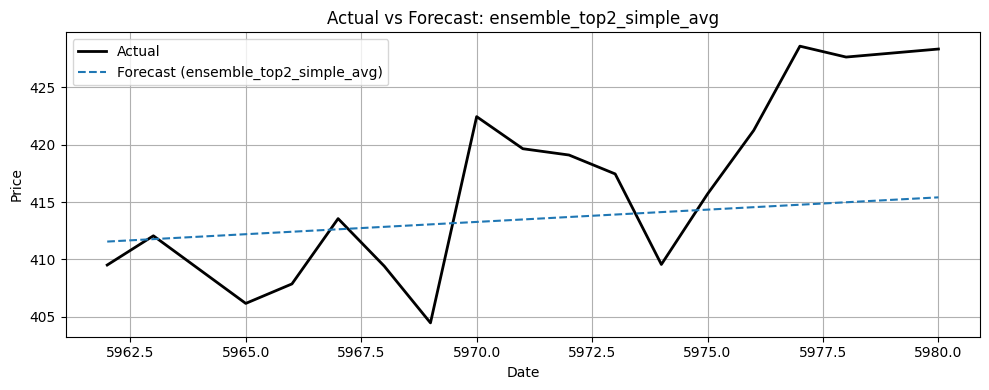

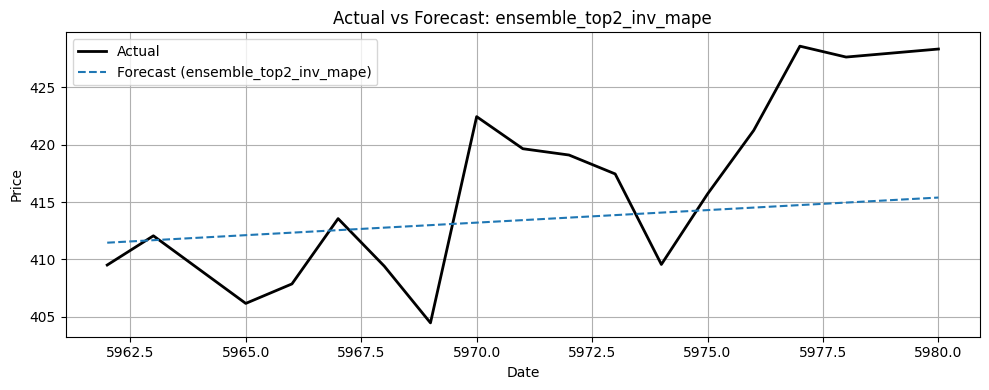

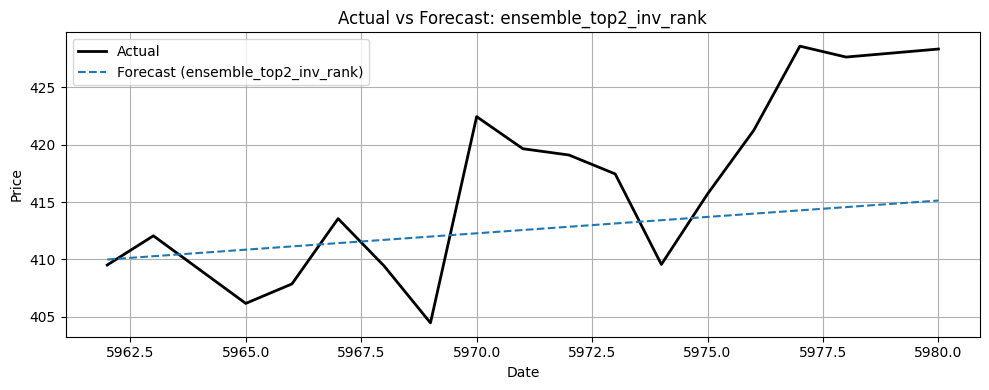

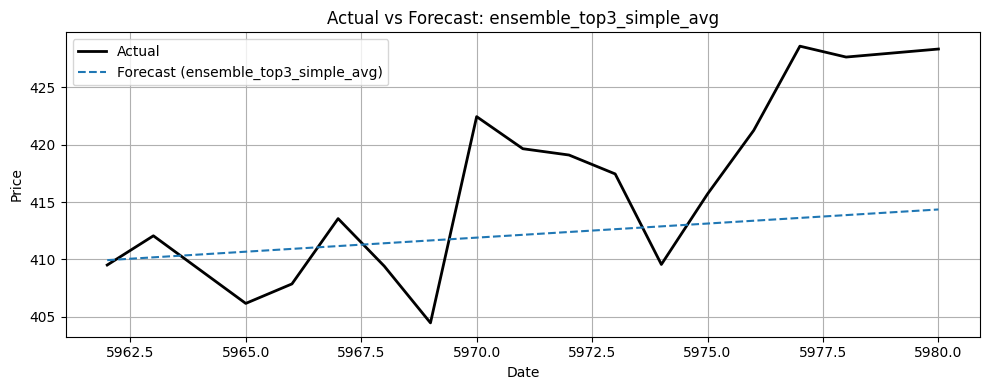

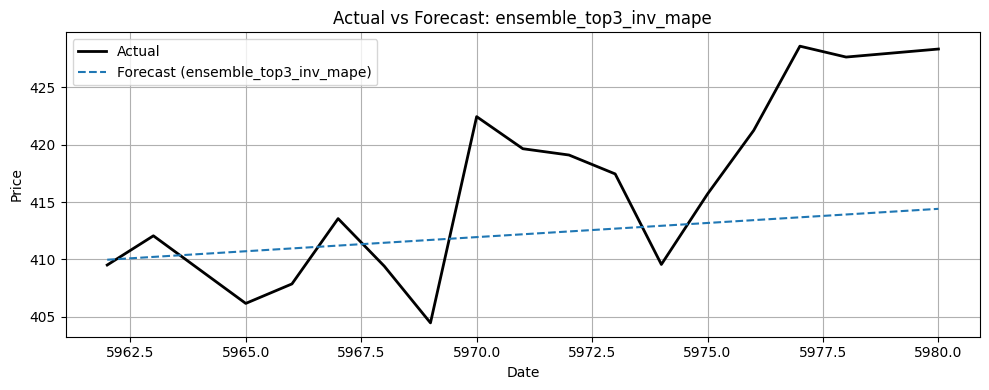

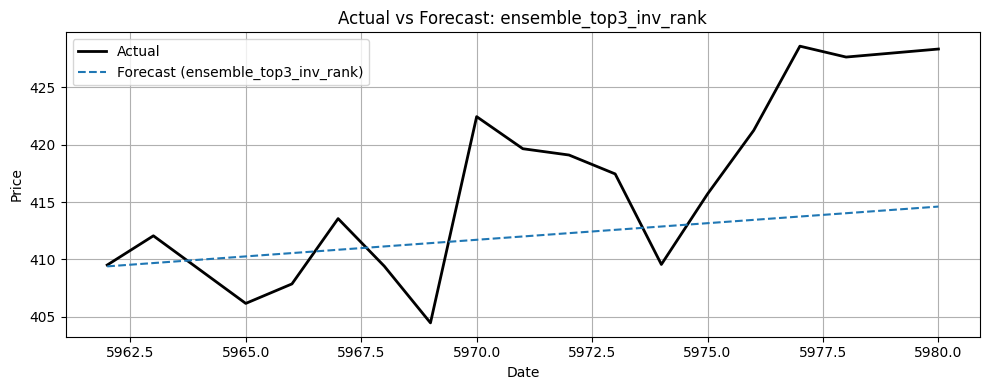

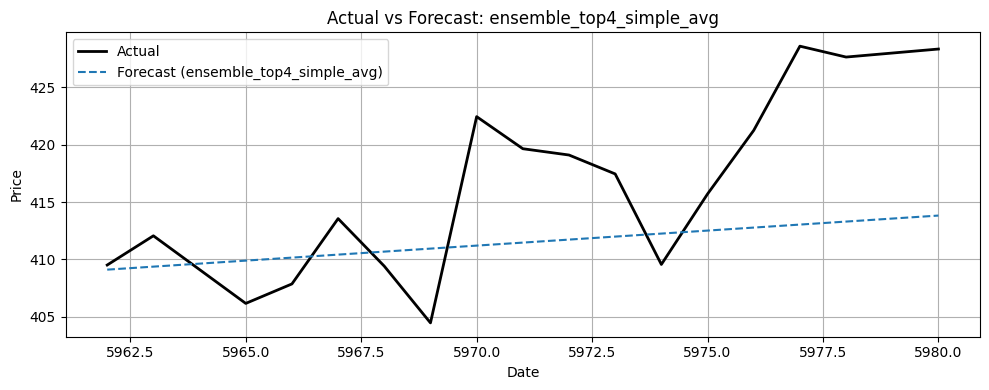

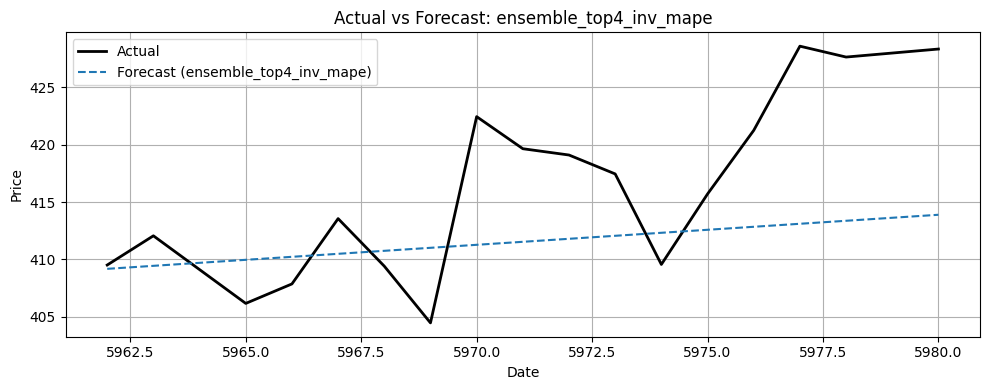

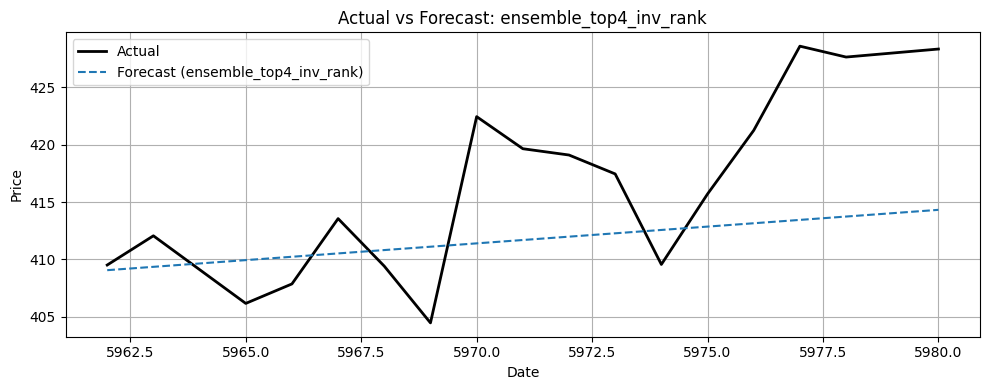

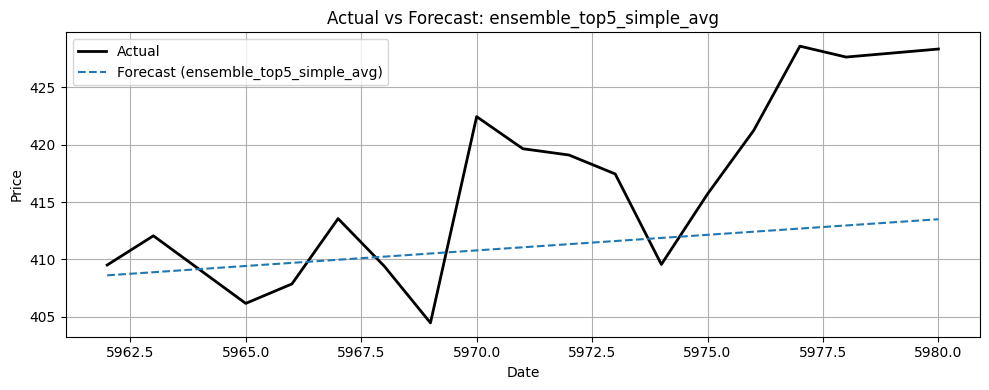

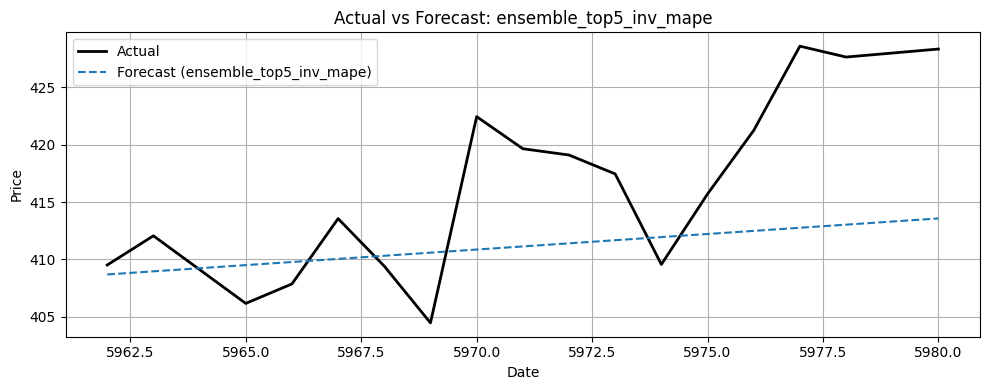

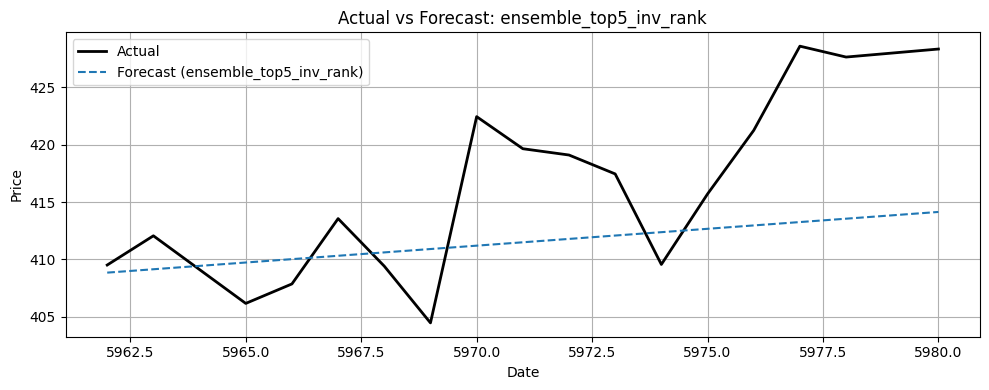

In [32]:
import matplotlib.pyplot as plt

for model_name, forecast in ensemble_forecasts.items():
    plt.figure(figsize=(10, 4))
    plt.plot(itc_val.index, itc_val['y'], label='Actual', color='black', linewidth=2)
    plt.plot(itc_val.index, forecast, label=f'Forecast ({model_name})', linestyle='--')
    plt.title(f'Actual vs Forecast: {model_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [33]:
# -----------------------------------------------------------
# Using full itc_filtered for training - test set forecast
# ----------------------------------------------------------

itc_filtered

,date,y,unique_id,ds
5482,2022-03-28,257.05,1,2022-03-28
5483,2022-03-29,254.60,1,2022-03-29
5484,2022-03-30,249.20,1,2022-03-30
5485,2022-03-31,250.65,1,2022-03-31
5486,2022-04-01,253.30,1,2022-04-01
...,...,...,...,...
5976,2024-03-21,421.25,1,2024-03-21
5977,2024-03-22,428.60,1,2024-03-22
5978,2024-03-26,427.65,1,2024-03-26
5979,2024-03-27,428.00,1,2024-03-27


In [35]:
# -------------------------------------
# Creating statsmodels object
# -------------------------------------

# itc_train = itc_train.drop(columns=['date'])

# Sort by date
itc_filtered = itc_filtered.sort_values('date')

# Create row number (starting from 1)
itc_filtered['ds'] = range(1, len(itc_filtered) + 1)

itc_filtered = itc_filtered[['unique_id','ds','y']]

itc_filtered

,unique_id,ds,y
5482,1,1,257.05
5483,1,2,254.60
5484,1,3,249.20
5485,1,4,250.65
5486,1,5,253.30
...,...,...,...
5976,1,495,421.25
5977,1,496,428.60
5978,1,497,427.65
5979,1,498,428.00


In [36]:
test_forecast = sf.forecast(df=itc_filtered, h=5)
test_forecast.head()

,unique_id,ds,AutoARIMA,AutoETS,AutoRegressive,SES,SeasonalES,Holt,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,RWD,WindowAverage,MSTL
0,1,500,428.693976,428.804052,428.165766,427.541897,417.429087,428.691459,404.45,419.470975,404.45,379.337675,430.073407,428.693976,420.183333,429.729278
1,1,501,429.037952,429.252023,427.401860,427.541897,423.399290,429.033198,422.45,419.470975,422.45,379.337675,430.026870,429.037952,420.183333,429.104204
2,1,502,429.381928,429.699995,427.799955,427.541897,422.127445,429.374936,419.65,419.470975,419.65,379.337675,431.201088,429.381928,420.183333,429.637681
3,1,503,429.725903,430.147967,427.719929,427.541897,420.036704,429.716675,419.10,419.470975,419.10,379.337675,430.821137,429.725904,420.183333,428.027354
4,1,504,430.069879,430.595938,428.353548,427.541897,418.148538,430.058413,417.45,419.470975,417.45,379.337675,430.918730,430.069880,420.183333,426.585027


In [37]:
itc_test

,Date,Open,High,Low,Close
0,4/1/2024,429.10,431.35,425.75,426.70
1,4/2/2024,428.70,428.70,424.60,425.85
2,4/3/2024,426.00,428.80,421.00,425.20
3,4/4/2024,425.55,427.55,419.90,422.75
4,4/5/2024,422.50,431.70,419.95,427.55
